
Welcome to our PC part price web scraper

Which device do you want to look at:
------------------------------------
1) CPU
2) GPU
3) RAM
4) Motherboard
5) CPU Cooler
6) Power Supply
7) Case
8) Update Data (Recommended when first open)
9) Exit



Please enter your choice:  3



You selected: RAM
-----------------
Which RAM do you want to see:
-----------------------------
1) Corsair Vengeance RGB DDR5 32GB
2) Back



Please enter your choice:  1



You selected: Corsair Vengeance RGB DDR5 32GB
---------------------------------------------

Last checked prices:
----------------------
Microcenter: $389.99
Newegg: $399.99
1) Display Price History Graph
2) Back



Please enter your choice:  1



You selected: Display Price History Graph
-----------------------------------------


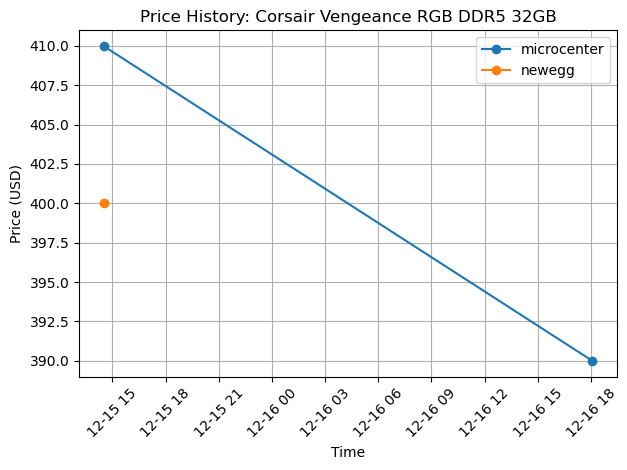

1) Display Price History Graph
2) Back



Please enter your choice:  2



You selected: Back
------------------
Which RAM do you want to see:
-----------------------------
1) Corsair Vengeance RGB DDR5 32GB
2) Back



Please enter your choice:  2



You selected: Back
------------------
Which device do you want to look at:
------------------------------------
1) CPU
2) GPU
3) RAM
4) Motherboard
5) CPU Cooler
6) Power Supply
7) Case
8) Update Data (Recommended when first open)
9) Exit



Please enter your choice:  8



You selected: Update Data (Recommended when first open)
-------------------------------------------------------

[INFO] Updating data from all sources...

Which device do you want to look at:
------------------------------------
1) CPU
2) GPU
3) RAM
4) Motherboard
5) CPU Cooler
6) Power Supply
7) Case
8) Update Data (Recommended when first open)
9) Exit



Please enter your choice:  3



You selected: RAM
-----------------
Which RAM do you want to see:
-----------------------------
1) Corsair Vengeance RGB DDR5 32GB
2) Back



Please enter your choice:  1



You selected: Corsair Vengeance RGB DDR5 32GB
---------------------------------------------

Last checked prices:
----------------------
Microcenter: $409.99
Newegg: $409.99
1) Display Price History Graph
2) Back



Please enter your choice:  1



You selected: Display Price History Graph
-----------------------------------------


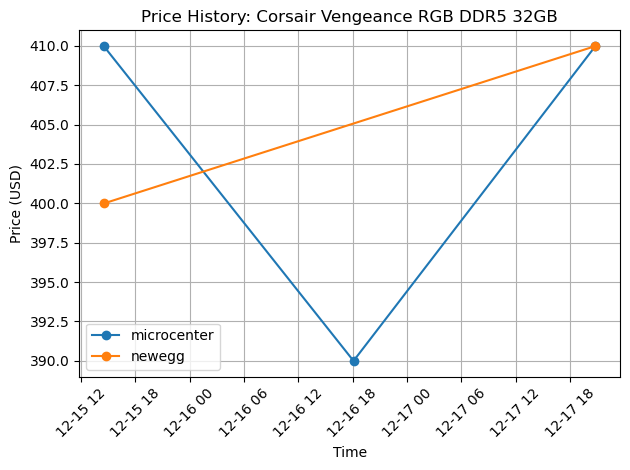

1) Display Price History Graph
2) Back



Please enter your choice:  2



You selected: Back
------------------
Which RAM do you want to see:
-----------------------------
1) Corsair Vengeance RGB DDR5 32GB
2) Back



Please enter your choice:  2



You selected: Back
------------------
Which device do you want to look at:
------------------------------------
1) CPU
2) GPU
3) RAM
4) Motherboard
5) CPU Cooler
6) Power Supply
7) Case
8) Update Data (Recommended when first open)
9) Exit



Please enter your choice:  9



Goodbye!


In [ ]:
import importlib
import project_utils
from scrapers.mainScraper import mainScraper
importlib.reload(project_utils)
importlib.reload(scrapers.mainScraper)
importlib.reload(scrapers.microcenter)
# importlib.reload(scrapers)
# import project_utils
# print("Imported from:", project_utils.__file__)
# print("Has display_menu:", hasattr(project_utils, "display_menu"))
# print("Has get_all_categories:", hasattr(project_utils, "get_all_categories"))
# print("Has get_products_by_category:", hasattr(project_utils, "get_products_by_category"))


def run_menu(file_path: str):
    """
    Main CLI menu loop for the PC Part Price Web Scraper.
    """
    scraper = mainScraper()
    
    print("\nWelcome to our PC part price web scraper\n")

    main_menu_options = [
        "CPU",
        "GPU",
        "RAM",
        "Motherboard",
        "CPU Cooler",
        "Power Supply",
        "Case",
        "Update Data (Recommended when first open)",
        "Exit"
    ]

    while True:
        category = project_utils.display_menu(
            main_menu_options,
            prompt="Which device do you want to look at:"
        )

        if category is None:
            print("\nGoodbye!")
            break

        # ---- Update Data placeholder ----
        if category.lower().startswith("update"):
            print("\n[INFO] Updating data from all sources...\n")
            scraper.update_json_data(file_path)
            
            continue

        # ---- Get products in chosen category ----
        products = project_utils.get_products_by_category(file_path, category)

        if not products:
            print(f"\nNo products found for category: {category}\n")
            continue

        # ---- Product selection loop ----
        while True:
            product_menu = products + ["Back"]
            product_choice = display_menu(
                product_menu,
                prompt=f"Which {category} do you want to see:"
            )

            if product_choice is None or product_choice == "Back":
                break

            # ---- Show latest prices ----
            latest_prices = project_utils.get_latest_prices_for_product(file_path, product_choice)

            print("\nLast checked prices:")
            print("-" * 22)

            for source, entry in latest_prices.items():
                if entry is None:
                    print(f"{source.title()}: No data")
                else:
                    price = entry["price"]
                    print(f"{source.title()}: ${price:.2f}")

            # ---- Action menu ----
            action_menu = [
                "Display Price History Graph",
                "Back"
            ]

            while True:
                action = project_utils.display_menu(action_menu)

                if action is None or action == "Back":
                    break

                if action.lower().startswith("display"):
                    project_utils.plot_price_history(file_path, product_choice)

# scraper = mainScraper("product_data_test.json")
# url = "https://www.newegg.com/g-skill-ripjaws-m5-neo-rgb-series-32gb-ddr5-6000-cas-latency-cl36-desktop-memory-black/p/N82E16820374642?Item=N82E16820374642"
# url = "https://www.shopblt.com/cgi-bin/shop/shop.cgi?action=thispage&thispage=011003501501_B6QC407P.shtml&order_id=198503165"
# url = "https://www.microcenter.com/product/688526/corsair-vengeance-rgb-32gb-(2-x-16gb)-ddr5-6000-pc5-48000-cl36-dual-channel-desktop-memory-kit-cmh32gx5m2m6000z36-black"
# scraper.scrape_product(url)
# print(scraper.scrape_product(url))
run_menu("product_data_test.json")